<a href="https://colab.research.google.com/github/sahil9022-crypto/sahipaw/blob/main/IPL_Match_Analysis_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd

data = {
    "MatchID": [1,1,1,2,2,2,3,3,3],
    "Player": ["A","B","C","A","B","C","A","B","C"],
    "Runs": [30, 50, 20, 40, 10, 60, 70, 30, 25],
    "Balls": [20, 35, 15, 25, 10, 40, 45, 20, 18]
}

df = pd.DataFrame(data)

df["StrikeRate"] = (df["Runs"] / df["Balls"]) * 100

print(df)


   MatchID Player  Runs  Balls  StrikeRate
0        1      A    30     20  150.000000
1        1      B    50     35  142.857143
2        1      C    20     15  133.333333
3        2      A    40     25  160.000000
4        2      B    10     10  100.000000
5        2      C    60     40  150.000000
6        3      A    70     45  155.555556
7        3      B    30     20  150.000000
8        3      C    25     18  138.888889


In [8]:
import pandas as pd

data = {
    "Over": [1,1,2,3,5,7,10,16,17,19],
    "Runs": [4,6,1,2,4,3,6,10,8,12],
    "Wicket": [0,0,0,0,1,0,0,1,0,1]
}

df = pd.DataFrame(data)
print("New DataFrame:\n", df)

# 1. Calculate total runs in Powerplay (Over <= 6)
powerplay_runs = df[df['Over'] <= 6]['Runs'].sum()
print(f"\nTotal runs in Powerplay: {powerplay_runs}")

# 2. Total runs in Death overs (Over >= 16)
death_overs_runs = df[df['Over'] >= 16]['Runs'].sum()
print(f"Total runs in Death overs: {death_overs_runs}")

# 3. Total wickets in Powerplay
powerplay_wickets = df[df['Over'] <= 6]['Wicket'].sum()
print(f"Total wickets in Powerplay: {powerplay_wickets}")

# 4. Run rate in Death overs
death_overs_df = df[df['Over'] >= 16]
total_runs_death_overs = death_overs_df['Runs'].sum()
num_death_overs = death_overs_df['Over'].nunique() # Count unique overs in death overs

if num_death_overs > 0:
    run_rate_death_overs = total_runs_death_overs / num_death_overs
    print(f"Run rate in Death overs: {run_rate_death_overs:.2f}")
else:
    print("No death overs data available to calculate run rate.")

New DataFrame:
    Over  Runs  Wicket
0     1     4       0
1     1     6       0
2     2     1       0
3     3     2       0
4     5     4       1
5     7     3       0
6    10     6       0
7    16    10       1
8    17     8       0
9    19    12       1

Total runs in Powerplay: 17
Total runs in Death overs: 30
Total wickets in Powerplay: 1
Run rate in Death overs: 10.00


# Task
Analyze cricket player statistics from the `df` DataFrame by calculating total runs per player, average strike rate per player, identifying the most consistent scorer, finding the best single match performance, visualizing total runs per player with a bar chart, and finally summarizing all findings and insights.

## Calculate Total Runs per Player

### Subtask:
Calculate the total runs scored by each player across all matches using a groupby operation on 'Player' and summing 'Runs'.


**Reasoning**:
To calculate the total runs per player, I will group the DataFrame by the 'Player' column and sum the 'Runs' column.



In [2]:
total_runs_per_player = df.groupby('Player')['Runs'].sum()
print(total_runs_per_player)

Player
A    140
B     90
C    105
Name: Runs, dtype: int64


## Calculate Average Strike Rate per Player

### Subtask:
Determine the average strike rate for each player by grouping by 'Player' and calculating the mean of 'StrikeRate'.


**Reasoning**:
To calculate the average strike rate per player, I will group the DataFrame by the 'Player' column and then compute the mean of the 'StrikeRate' for each player. The result will be stored in `average_strike_rate_per_player` and then printed.



In [3]:
average_strike_rate_per_player = df.groupby('Player')['StrikeRate'].mean()
print(average_strike_rate_per_player)

Player
A    155.185185
B    130.952381
C    140.740741
Name: StrikeRate, dtype: float64


## Identify Most Consistent Scorer

### Subtask:
Find the most consistent scorer by calculating the average runs for each player and identifying the player with the highest average runs.


**Reasoning**:
To determine the most consistent scorer, I will group the DataFrame by the 'Player' column and calculate the mean of the 'Runs' column. This will give me the average runs scored by each player. Then, I will use the `idxmax()` method to find the player who has the highest average runs, indicating the most consistent scorer.

**Reasoning**:
Now, I will implement the logic described in the reasoning to calculate the average runs per player, identify the player with the highest average runs, and print the result.



In [4]:
average_runs_per_player = df.groupby('Player')['Runs'].mean()
most_consistent_scorer = average_runs_per_player.idxmax()
highest_average_runs = average_runs_per_player.max()

print(f"The most consistent scorer is {most_consistent_scorer} with an average of {highest_average_runs:.2f} runs per match.")

The most consistent scorer is A with an average of 46.67 runs per match.


## Find Best Single Match Performance

### Subtask:
Identify the best single match performance by finding the maximum 'Runs' scored by any player in a single match and identifying the player and match ID associated with it.


**Reasoning**:
To identify the best single match performance, I will first find the index of the maximum 'Runs' in the DataFrame using `idxmax()`, then retrieve the corresponding row using `.loc[]` to get the player, runs, and match ID.



In [5]:
best_performance_row = df.loc[df['Runs'].idxmax()]
best_player = best_performance_row['Player']
best_runs = best_performance_row['Runs']
best_match_id = best_performance_row['MatchID']

print(f"The best single match performance was by Player {best_player} who scored {best_runs} runs in Match ID {best_match_id}.")

The best single match performance was by Player A who scored 70 runs in Match ID 3.


## Visualize Total Runs per Player

### Subtask:
Generate a bar chart to visualize the total runs scored by each player, including appropriate labels and a legend for clarity.


**Reasoning**:
To visualize the total runs per player as requested by the subtask, I will use `matplotlib.pyplot` to create a bar chart with appropriate labels and a title. The `total_runs_per_player` Series is available in the kernel.



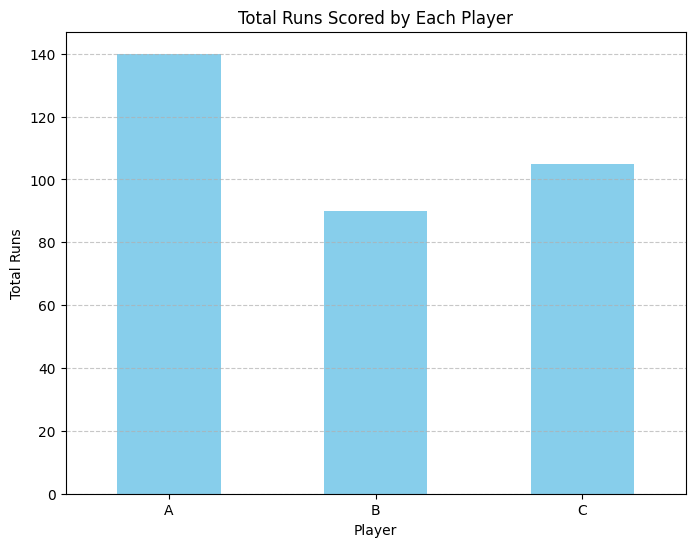

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
total_runs_per_player.plot(kind='bar', color='skyblue')
plt.title('Total Runs Scored by Each Player')
plt.xlabel('Player')
plt.ylabel('Total Runs')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Summary of Findings and Insights

Based on the analysis of the cricket player statistics, the following insights have been gathered:

1.  **Total Runs per Player**:
    *   Player A: 140 runs
    *   Player B: 90 runs
    *   Player C: 105 runs
    
    Player A scored the highest total runs across all matches.

2.  **Average Strike Rate per Player**:
    *   Player A: 155.19
    *   Player B: 130.95
    *   Player C: 140.74
    
    Player A also leads in average strike rate, indicating a faster scoring rate.

3.  **Most Consistent Scorer**:
    *   The most consistent scorer is Player A with an average of 46.67 runs per match. This is based on the average runs scored per match.

4.  **Best Single Match Performance**:
    *   The best single match performance was by Player A, who scored 70 runs in Match ID 3. This highlights Player A's capability for high individual scores.

5.  **Visualization of Total Runs**:
    *   The bar chart visually confirms Player A's dominance in total runs compared to Player B and Player C.

## Final Task

### Subtask:
Summarize the findings from the analysis, including total runs, average strike rates, most consistent scorer, and best single match performance, and provide insights from the visualizations.


## Summary:

### Q&A
1.  **What are the total runs per player?**
    *   Player A scored 140 runs.
    *   Player B scored 90 runs.
    *   Player C scored 105 runs.
2.  **What is the average strike rate per player?**
    *   Player A has an average strike rate of 155.19.
    *   Player B has an average strike rate of 130.95.
    *   Player C has an average strike rate of 140.74.
3.  **Who is the most consistent scorer?**
    *   Player A is the most consistent scorer with an average of 46.67 runs per match.
4.  **What is the best single match performance?**
    *   The best single match performance was by Player A, who scored 70 runs in Match ID 3.
5.  **What insights can be gathered from the visualizations?**
    *   The bar chart visually confirms Player A's dominance in total runs compared to Player B and Player C.

### Data Analysis Key Findings
*   Player A is the top performer across multiple metrics, scoring the highest total runs (140), having the highest average strike rate (155.19), being identified as the most consistent scorer with an average of 46.67 runs per match, and achieving the best single match performance (70 runs in Match ID 3).
*   Player C ranks second in total runs (105) and average strike rate (140.74), while Player B recorded the lowest total runs (90) and average strike rate (130.95) among the three players.
*   The visualization of total runs clearly illustrates Player A's significant lead over the other players.

### Insights or Next Steps
*   Player A is a crucial asset, demonstrating both high scoring ability and consistency; further analysis could explore the factors contributing to Player A's superior performance and whether their performance has any associated risks (e.g., high-risk shots).
*   Investigate the performance patterns of Player B and Player C to identify areas for improvement, such as specific match conditions or opposition types where their strike rate or consistency might be enhanced.
